### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rc('font', size=16)
plt.style.use('dark_background')

### Load Dataset

In [2]:
df = pd.read_csv('banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Exploratory Data Analysis

In [3]:
print(f'Jumlah data : {df.shape[0]}')
print(f'Jumlah kolom : {df.shape[1]}')

Jumlah data : 41188
Jumlah kolom : 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Check y label

In [10]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

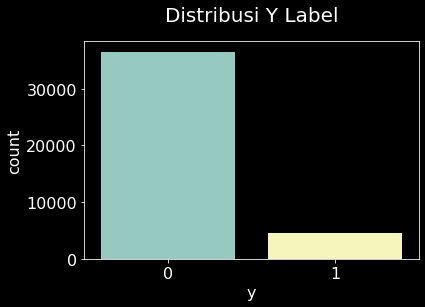

In [11]:
sns.countplot(x='y', data=df)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.title('Distribusi Y Label', fontsize=20, pad=20)
plt.show()

### Job Column

In [12]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


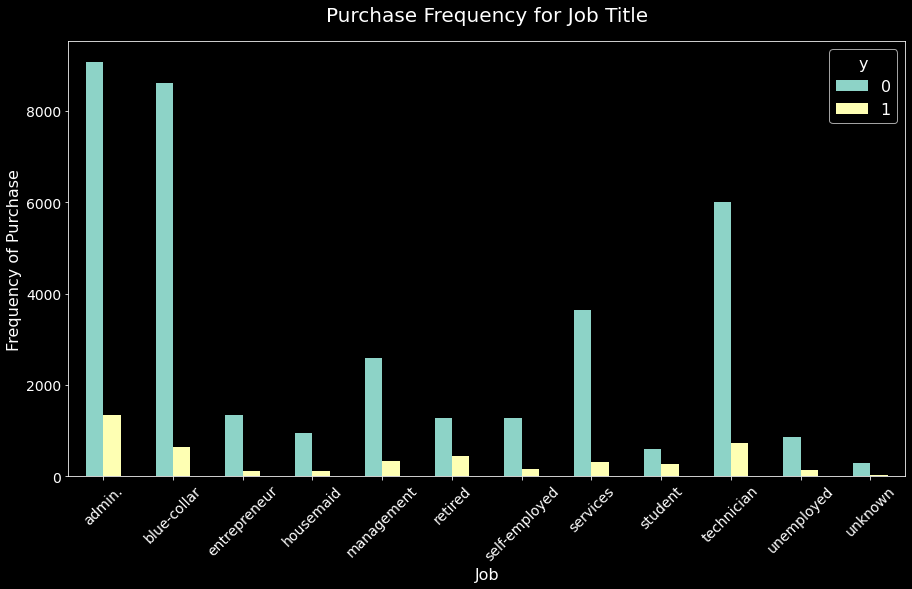

In [13]:
pd.crosstab(df['job'], df['y']).plot(kind='bar',figsize=(15,8))
plt.title('Purchase Frequency for Job Title', fontsize=20, pad=20)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.xticks(rotation=45)
plt.show()

### Marital Column

In [14]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


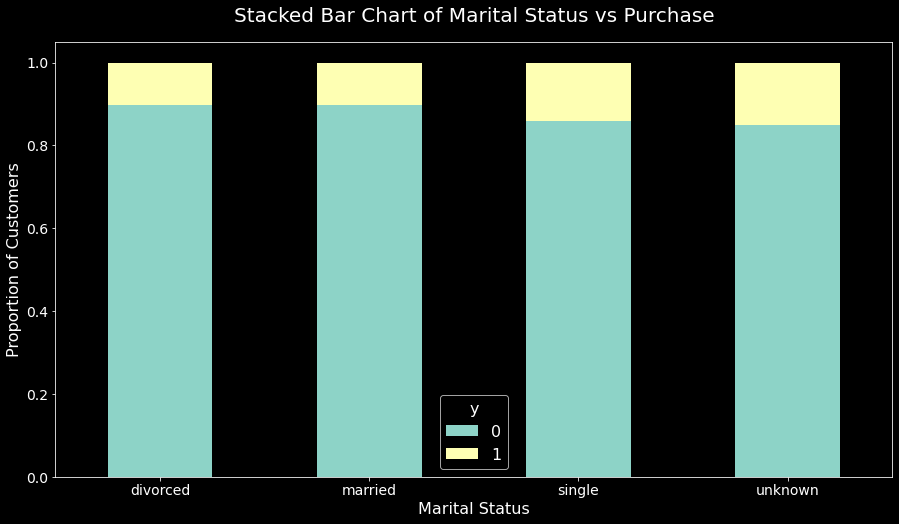

In [15]:
table=pd.crosstab(df['marital'], df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(15,8))
plt.title('Stacked Bar Chart of Marital Status vs Purchase',fontsize=20, pad=20)
plt.xticks(rotation=0)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

### Education Group

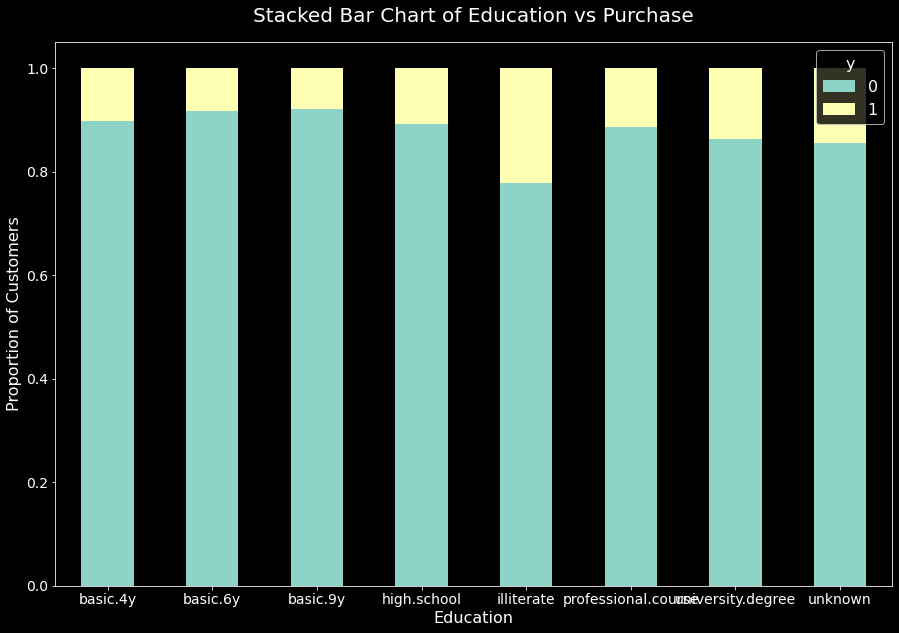

In [16]:
table=pd.crosstab(df.education, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Stacked Bar Chart of Education vs Purchase', fontsize=20, pad=20)
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

### Day of week column

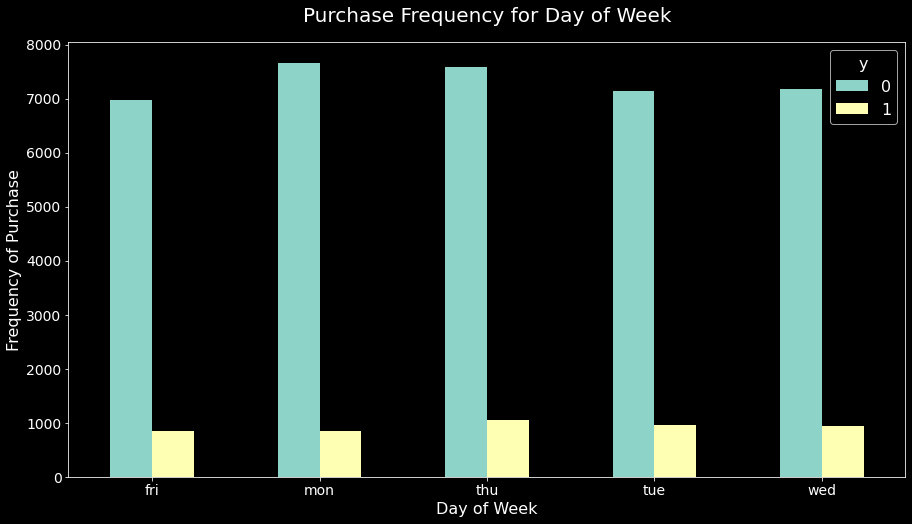

In [17]:
pd.crosstab(df.day_of_week, df.y).plot(kind='bar', figsize=(15,8))
plt.title('Purchase Frequency for Day of Week', fontsize=20, pad=20)
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.xticks(rotation=0)
plt.show()

### Month Column

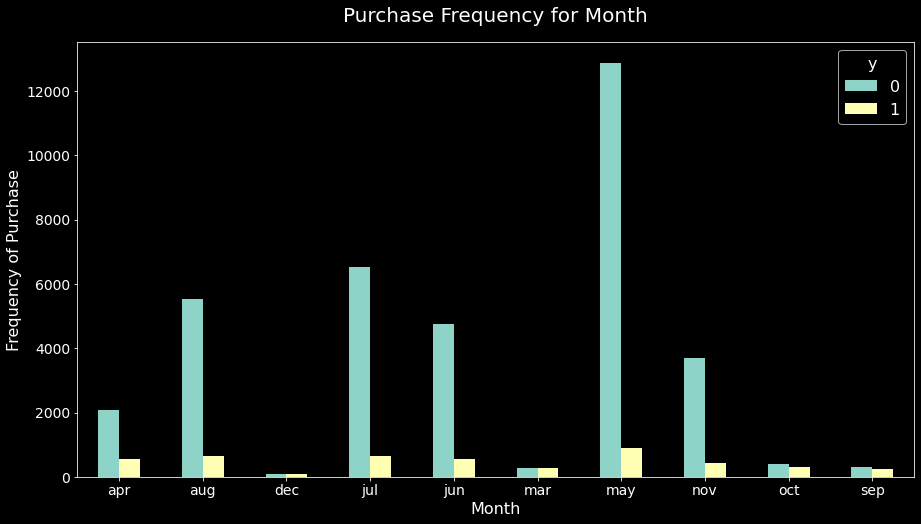

In [18]:
pd.crosstab(df.month, df.y).plot(kind='bar', figsize=(15,8))
plt.title('Purchase Frequency for Month', fontsize=20, pad=20)
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.xticks(rotation=0)
plt.show()

### Age Column

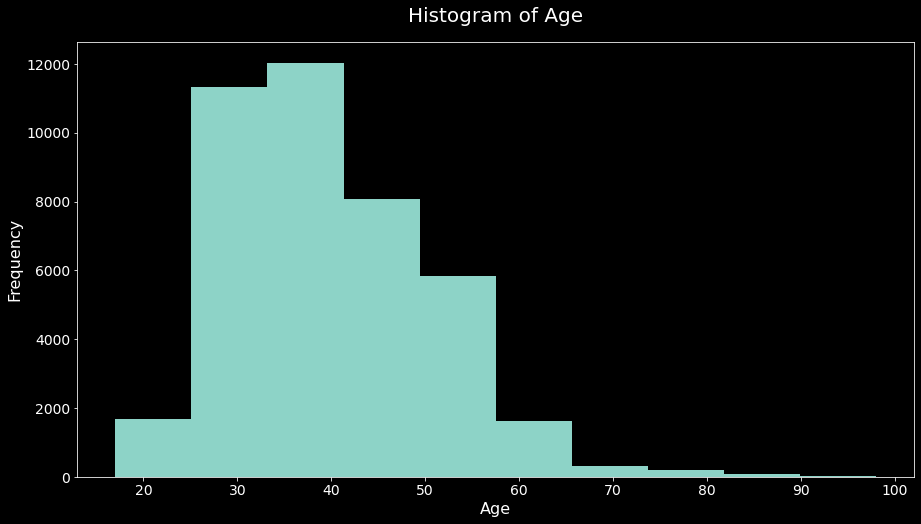

In [20]:
df.age.hist(figsize=(15,8))
plt.title('Histogram of Age', fontsize=20, pad=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Outcome Column

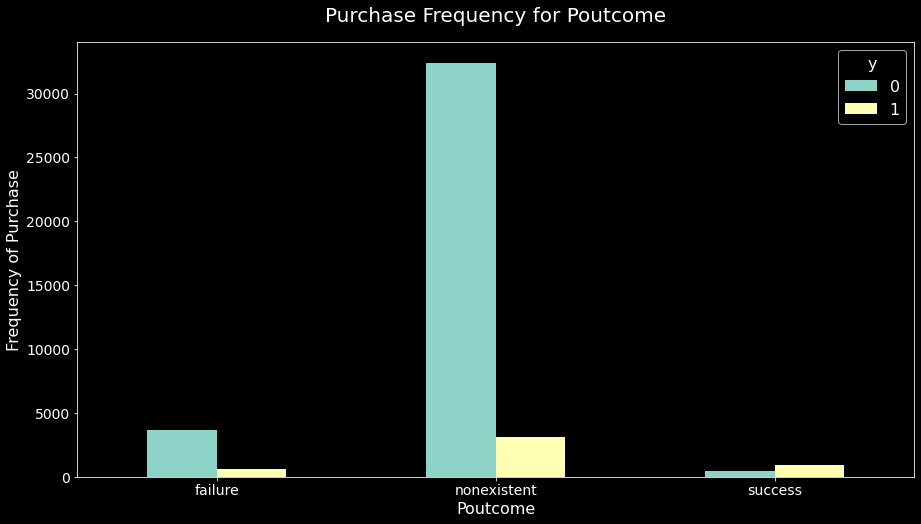

In [21]:
pd.crosstab(df.poutcome, df.y).plot(kind='bar', figsize=(15,8))
plt.title('Purchase Frequency for Poutcome', fontsize=20, pad=20)
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.xticks(rotation=0)
plt.show()

### Data Preparation

### Handling imbalance data
- in this case we will use undersampling to build a simple dataset containing similar distribution of subscribed deposit and not subscribed deposit.

In [22]:
print(f'Number of Subcribed Deposit : {df.y.value_counts()[1]}')
print(f'Number of Not Subcribed Deposit : {df.y.value_counts()[0]}')

Number of Subcribed Deposit : 4640
Number of Not Subcribed Deposit : 36548


In [23]:
# split class
subs_df = df[df['y'] == 1]
notsubs_df = df[df['y'] == 0]

In [25]:
# random sample data 
notsubs_df_sample = notsubs_df.sample(random_state= 78, n= 4640)
notsubs_df_sample.shape

(4640, 21)

In [26]:
new_df = pd.concat([notsubs_df_sample, subs_df], axis=0)
new_df.y.value_counts()

0    4640
1    4640
Name: y, dtype: int64

### Transform Categorical Data

In [27]:
cat_var = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_var:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(new_df[var], prefix=var)
    data1 = new_df.join(cat_list)
    new_df = data1

In [28]:
new_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_a

In [30]:
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1752,71,retired,married,basic.9y,no,no,no,cellular,oct,fri,...,1,0,1,0,0,0,0,0,1,0
34007,33,admin.,single,university.degree,no,no,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
15882,52,technician,divorced,professional.course,no,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
36806,31,technician,single,university.degree,no,yes,yes,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
40355,34,admin.,married,basic.9y,no,yes,no,cellular,apr,mon,...,0,0,0,1,0,0,0,0,1,0


In [31]:
# remove categorical data
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars = new_df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [32]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mo

In [34]:
df2 = new_df[to_keep]
df2.shape

(9280, 63)

### Build the model

In [35]:
x = df2.drop('y', axis=1)
y = df2['y']

In [36]:
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1752,71,131,2,999,0,-3.4,92.431,-26.9,0.752,5017.5,...,1,0,1,0,0,0,0,0,1,0
34007,33,277,2,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,1,0,0,0,1,0
15882,52,205,1,999,0,1.4,93.444,-36.1,4.962,5228.1,...,0,0,0,0,1,0,0,0,1,0
36806,31,244,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
40355,34,317,1,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41125,40,365,4,999,0,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,0,1,0
41129,55,585,2,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
41130,28,1111,5,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,0,1,0,0,0,0,0,1,0
41172,27,1309,4,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,0,0,0,1,0,1,0


### Splitting the data

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.3)
X_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
30054,51,670,1,999,0,-0.1,93.200,-42.0,4.120,5195.8,...,0,0,0,0,0,0,1,0,1,0
39226,27,313,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,0,0,0,1,0,0,0,1,0,0
5060,43,1193,1,999,0,-1.7,94.215,-40.3,0.884,4991.6,...,0,0,0,0,1,0,0,0,1,0
18512,29,292,1,6,1,-3.4,92.431,-26.9,0.730,5017.5,...,1,0,1,0,0,0,0,0,0,1
21633,31,41,1,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28525,37,214,1,999,0,-1.8,93.749,-34.6,0.644,5008.7,...,0,0,0,0,1,0,0,0,1,0
40645,48,955,2,999,0,-1.8,92.893,-46.2,1.291,5099.1,...,0,0,0,0,0,1,0,0,1,0
1956,44,805,3,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
16273,32,128,2,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,1,0,0,0,0,1,0


### Normalize the data

In [39]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

X_train

array([[ 0.88084585,  0.78451113, -0.58840813, ..., -0.36128324,
         0.53248549, -0.3433364 ],
       [-1.10096197, -0.21780208, -0.58840813, ...,  2.76791137,
        -1.87798543, -0.3433364 ],
       [ 0.22024324,  2.25288595, -0.58840813, ..., -0.36128324,
         0.53248549, -0.3433364 ],
       ...,
       [ 0.30281857,  1.16353714,  0.31756466, ..., -0.36128324,
         0.53248549, -0.3433364 ],
       [-0.68808534, -0.73720808, -0.13542173, ..., -0.36128324,
         0.53248549, -0.3433364 ],
       [-1.10096197, -0.50417728, -0.13542173, ..., -0.36128324,
         0.53248549, -0.3433364 ]])

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Testing the model

In [41]:
model_score = logreg.score(X_test, y_test)

print(f'Model Accuracy = {model_score}')

Model Accuracy = 0.853448275862069
